In [1]:
# Import the libraries

from datetime import datetime as dt
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
!pip install yfinance

In [4]:
import yfinance as yf

In [5]:
comp = yf.Ticker("BMW.DE")

In [6]:
df1 = comp.history(period="max")
df1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-11-08 00:00:00+01:00,9.353778,9.353778,9.333745,9.333745,767000,0.0,0.0
1996-11-11 00:00:00+01:00,9.343507,9.348644,9.288032,9.308578,260000,0.0,0.0
1996-11-12 00:00:00+01:00,9.328611,9.414392,9.293168,9.378950,1066000,0.0,0.0
1996-11-13 00:00:00+01:00,9.422611,9.422611,9.343508,9.364054,793000,0.0,0.0
1996-11-14 00:00:00+01:00,9.351210,9.394358,9.313713,9.394358,351000,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-08 00:00:00+01:00,100.760002,101.680000,100.419998,100.959999,928097,0.0,0.0
2023-03-09 00:00:00+01:00,102.180000,103.699997,97.250000,99.529999,2224785,0.0,0.0
2023-03-10 00:00:00+01:00,96.040001,98.330002,96.000000,98.330002,1638110,0.0,0.0


In [7]:
ticks = ["BMW.DE", "MBG.DE", "VOW3.DE", "TL0.DE", "PAH3.DE"]

In [8]:
df = yf.download(ticks, start='2011-1-1', end='2023-3-1')['Adj Close']
df

[*********************100%***********************]  5 of 5 completed


,BMW.DE,MBG.DE,PAH3.DE,TL0.DE,VOW3.DE
Date,,,,,
2011-01-03,37.248692,29.087132,39.393372,1.313333,81.958580
2011-01-04,36.818321,29.244633,39.353111,1.338000,82.889938
2011-01-05,36.387939,30.150261,39.025261,1.333333,80.770317
2011-01-06,36.309147,30.712769,38.283298,1.401333,80.192238
2011-01-07,35.951504,30.673391,40.192856,1.401333,82.119148
...,...,...,...,...,...
2023-02-22,98.430000,73.980003,54.660000,184.199997,131.199997
2023-02-23,99.650002,74.110001,54.580002,186.880005,131.899994
2023-02-24,97.190002,71.940002,53.119999,185.559998,127.800003


In [9]:
df = df.rename(columns={'BMW.DE':'BMW', 'MBG.DE':'Mercedes', 'TL0.DE':'Tesla', 'VOW3.DE':'VW', 'PAH3.DE':'Porsche'})
df

,BMW,Mercedes,Porsche,Tesla,VW
Date,,,,,
2011-01-03,37.248692,29.087132,39.393372,1.313333,81.958580
2011-01-04,36.818321,29.244633,39.353111,1.338000,82.889938
2011-01-05,36.387939,30.150261,39.025261,1.333333,80.770317
2011-01-06,36.309147,30.712769,38.283298,1.401333,80.192238
2011-01-07,35.951504,30.673391,40.192856,1.401333,82.119148
...,...,...,...,...,...
2023-02-22,98.430000,73.980003,54.660000,184.199997,131.199997
2023-02-23,99.650002,74.110001,54.580002,186.880005,131.899994
2023-02-24,97.190002,71.940002,53.119999,185.559998,127.800003


In [13]:
import seaborn as sns

In [14]:
df.corr()

,BMW,Mercedes,Porsche,Tesla,VW
BMW,1.000000,0.956276,0.787840,0.639038,0.696864
Mercedes,0.956276,1.000000,0.796513,0.660395,0.677797
Porsche,0.787840,0.796513,1.000000,0.754455,0.895920
Tesla,0.639038,0.660395,0.754455,1.000000,0.476145
VW,0.696864,0.677797,0.895920,0.476145,1.000000


<Axes: >

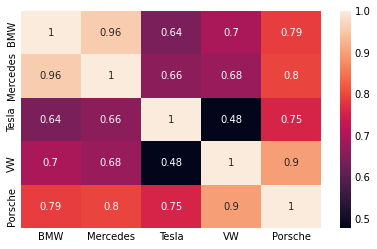

In [15]:
sns.heatmap(df[['BMW', 'Mercedes', 'Tesla', 'VW', 'Porsche']].corr(), annot=True)

<Axes: xlabel='Date', ylabel='BMW'>

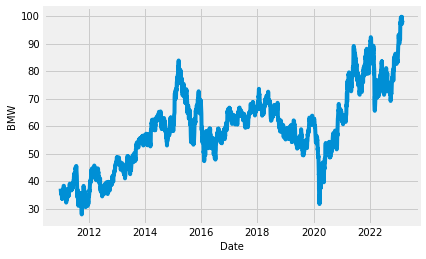

In [16]:
sns.lineplot(data=df, x='Date', y='BMW')

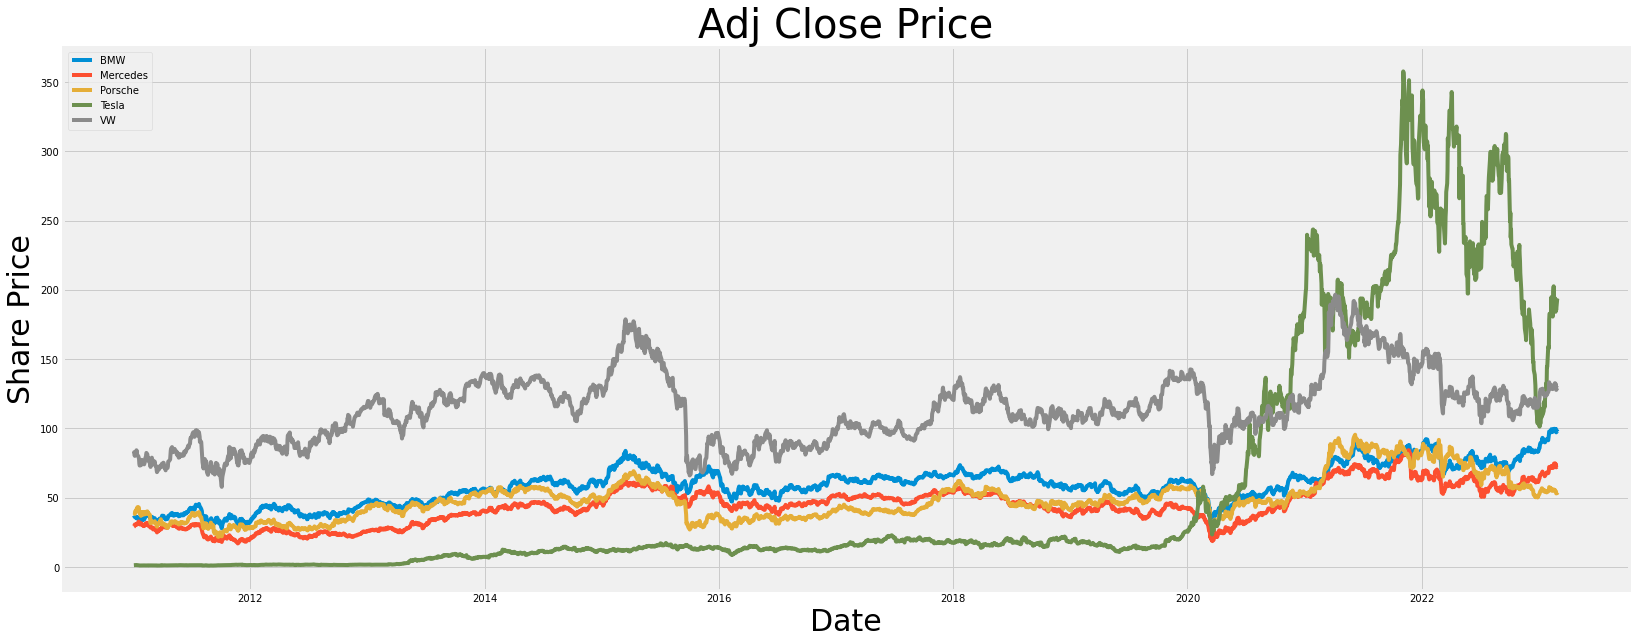

In [17]:
fig = plt.figure(figsize=(25,10))
plt.plot(df.BMW)
plt.plot(df.Mercedes)
plt.plot(df.Porsche)
plt.plot(df.Tesla)
plt.plot(df.VW)
plt.legend(df.columns.values, loc='upper left')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Share Price', fontsize=30)
plt.title('Adj Close Price', fontsize=40)
plt.show()

In [18]:
daily_simple_returns = df.pct_change(1)
daily_simple_returns

,BMW,Mercedes,Porsche,Tesla,VW
Date,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN
2011-01-04,-0.011554,0.005415,-0.001022,0.018782,0.011364
2011-01-05,-0.011689,0.030967,-0.008331,-0.003488,-0.025572
2011-01-06,-0.002165,0.018657,-0.019012,0.051000,-0.007157
2011-01-07,-0.009850,-0.001282,0.049880,0.000000,0.024029
...,...,...,...,...,...
2023-02-22,-0.002736,-0.008178,-0.003646,-0.019900,0.000915
2023-02-23,0.012395,0.001757,-0.001464,0.014549,0.005335
2023-02-24,-0.024686,-0.029281,-0.026750,-0.007063,-0.031084


In [19]:
daily_simple_returns.corr()

,BMW,Mercedes,Porsche,Tesla,VW
BMW,1.000000,0.829892,0.741655,0.254853,0.782252
Mercedes,0.829892,1.000000,0.718169,0.233213,0.742734
Porsche,0.741655,0.718169,1.000000,0.247720,0.866820
Tesla,0.254853,0.233213,0.247720,1.000000,0.228567
VW,0.782252,0.742734,0.866820,0.228567,1.000000


<Axes: >

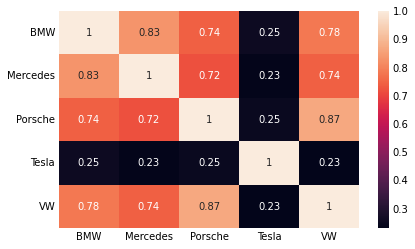

In [20]:
sns.heatmap(daily_simple_returns.corr(), annot=True)

In [21]:
daily_simple_returns.cov()

,BMW,Mercedes,Porsche,Tesla,VW
BMW,0.000332,0.000307,0.000304,0.000163,0.000313
Mercedes,0.000307,0.000411,0.000328,0.000166,0.000331
Porsche,0.000304,0.000328,0.000507,0.000196,0.000429
Tesla,0.000163,0.000166,0.000196,0.001236,0.000176
VW,0.000313,0.000331,0.000429,0.000176,0.000483


<Axes: >

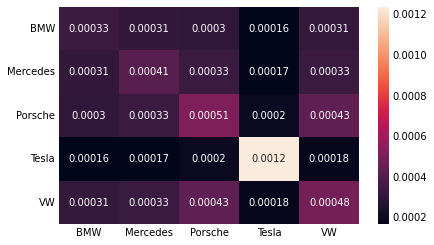

In [22]:
sns.heatmap(daily_simple_returns.cov(), annot=True)

In [23]:
daily_simple_returns.var()

BMW         0.000332
Mercedes    0.000411
Porsche     0.000507
Tesla       0.001236
VW          0.000483
dtype: float64

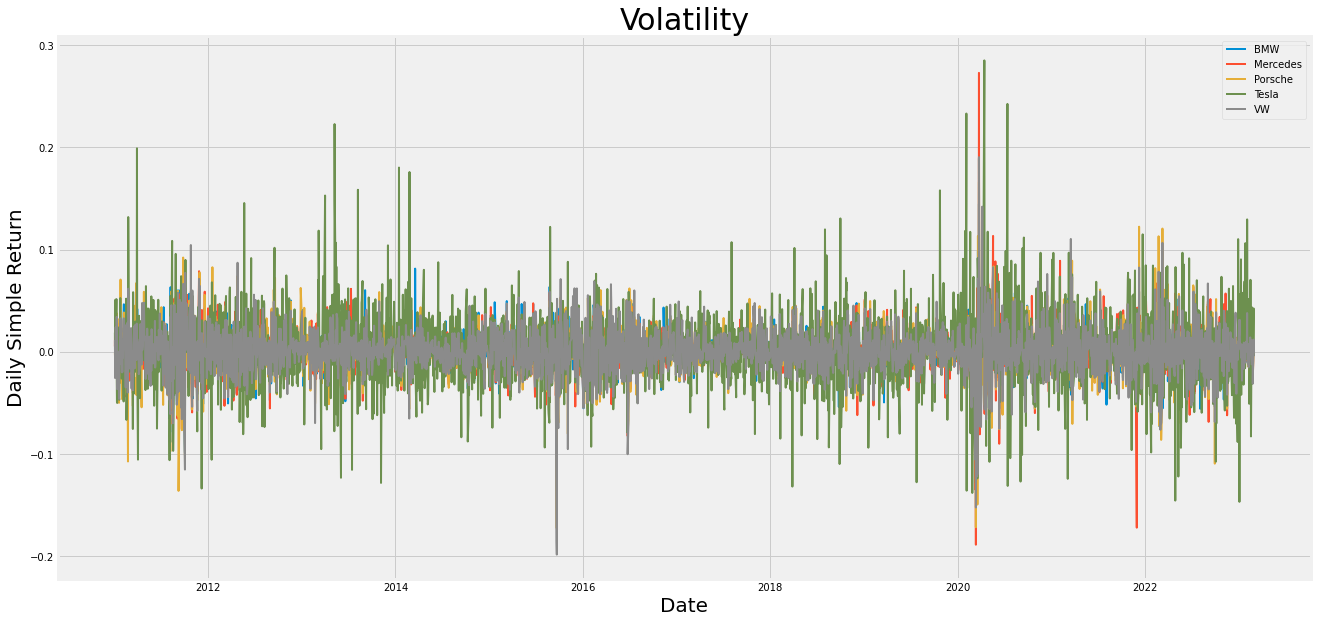

In [24]:
plt.figure(figsize=(20,10))
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns[c], lw=2, label=c)

  plt.legend(loc='upper right', fontsize=10)
  plt.title('Volatility', fontsize=30)
  plt.ylabel('Daily Simple Return', fontsize=20)
  plt.xlabel('Date', fontsize=20)

In [25]:
daily_simple_returns.mean()

BMW         0.000479
Mercedes    0.000502
Porsche     0.000356
Tesla       0.002230
VW          0.000390
dtype: float64

In [26]:
randomweight = np.array([0.4, 0.15, 0.15, 0.2, 0.1])
portfoliosimplereturn = np.sum(daily_simple_returns.mean() * randomweight)
print('The daily portfolio return: '+ str(portfoliosimplereturn))

The daily portfolio return: 0.0008051145653132489


In [27]:
print('The annual portfolio return: '+ str(portfoliosimplereturn * 253))

The annual portfolio return: 0.20369398502425198


In [28]:
# Calculate the growth of the investment
daily_cum_simp_return = (daily_simple_returns+1).cumprod()

# Show the cumulative simple returns
daily_cum_simp_return

,BMW,Mercedes,Porsche,Tesla,VW
Date,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.988446,1.005415,0.998978,1.018782,1.011364
2011-01-05,0.976892,1.036550,0.990656,1.015228,0.985502
2011-01-06,0.974776,1.055889,0.971821,1.067005,0.978448
2011-01-07,0.965175,1.054535,1.020295,1.067005,1.001959
...,...,...,...,...,...
2023-02-22,2.642509,2.543393,1.387543,140.253837,1.600809
2023-02-23,2.675262,2.547862,1.385512,142.294452,1.609349
2023-02-24,2.609219,2.473259,1.348450,141.289370,1.559324


In [29]:
# (period_1 + 1) * (period_2 + 1) * ...... * (period_n +1)
(daily_simple_returns['BMW'][1] + 1) * (daily_simple_returns['BMW'][2] + 1)

0.9768917492214928

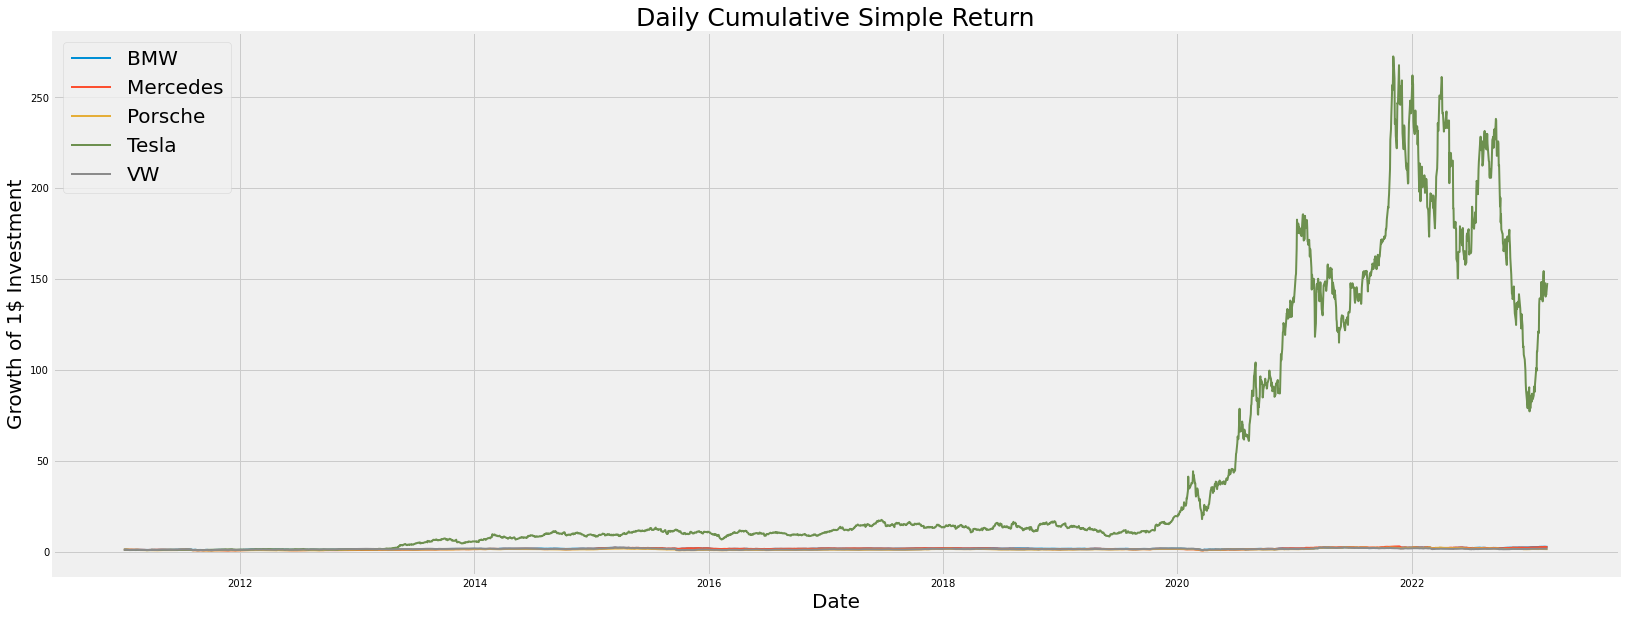

In [32]:
# Visualize the daily cumulative simple returns

plt.figure(figsize=(25,10))
for c in daily_cum_simp_return.columns.values:
  plt.plot(daily_cum_simp_return.index, daily_cum_simp_return[c], lw=2, label=c)

  plt.legend(loc='upper left', fontsize=20)
  plt.xlabel('Date', fontsize=20)
  plt.ylabel('Growth of 1$ Investment', fontsize=20)
  plt.title('Daily Cumulative Simple Return', fontsize=25)

In [33]:
annual_mean_returns = daily_simple_returns.mean() * 253
annual_return_variance = daily_simple_returns.var() * 253

In [34]:
df2 = pd.DataFrame(df.columns, columns=['Stock_Symbols'])
df2['Variances'] = annual_return_variance.values
df2['Returns'] = annual_mean_returns.values
df2

,Stock_Symbols,Variances,Returns
0,BMW,0.083992,0.121139
1,Mercedes,0.104018,0.127016
2,Porsche,0.128216,0.089963
3,Tesla,0.312649,0.564124
4,VW,0.122073,0.098664


In [35]:
from sklearn.cluster import KMeans

In [40]:
# Use the Elbow method to determine the number of clusters to use to group the Stocks
# Get and store the annual returns and variances
X = df2[['Returns', 'Variances']].values
X

array([[0.1211394 , 0.08399232],
       [0.12701635, 0.10401839],
       [0.08996344, 0.12821597],
       [0.56412426, 0.31264884],
       [0.09866402, 0.12207277]])

In [46]:
inertia_list = []
for k in range(2,5):
  #Create and train the model
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)

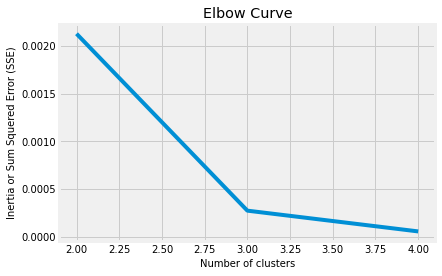

In [47]:
 #Plot the data
plt.plot(range(2,5), inertia_list)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia or Sum Squered Error (SSE)')
plt.show()

In [48]:
# Get and show the labels / groups 
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_
labels

array([2, 2, 0, 1, 0])

In [49]:
# Add labels to dataset
df2['Clusters'] = labels
df2

,Stock_Symbols,Variances,Returns,Clusters
0,BMW,0.083992,0.121139,2
1,Mercedes,0.104018,0.127016,2
2,Porsche,0.128216,0.089963,0
3,Tesla,0.312649,0.564124,1
4,VW,0.122073,0.098664,0


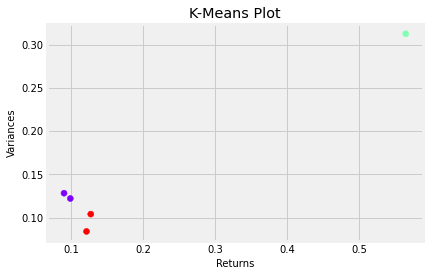

In [50]:
# Plot and show the clusters
plt.scatter(X[:,0], X[:,1], c = labels, cmap = 'rainbow')
plt.title('K-Means Plot')
plt.xlabel('Returns')
plt.ylabel('Variances')
plt.show()

In [53]:
# create a function to build a simple diverce portfolio
def diversed_port():
  for i in range(0, 4):
    symbol = df2[df2['Clusters'] == i].head()
    print(symbol[['Stock_Symbols', 'Clusters']])

In [54]:
diversed_port()

  Stock_Symbols  Clusters
2       Porsche         0
4            VW         0
  Stock_Symbols  Clusters
3         Tesla         1
  Stock_Symbols  Clusters
0           BMW         2
1      Mercedes         2
Empty DataFrame
Columns: [Stock_Symbols, Clusters]
Index: []


In [55]:
df.to_csv('Cars.csv')